# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [74]:
#cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
#url = "http://api.openweathermap.org/data/2.5/weather?"
#unit = "imperial"

#query_url = url + "appid=" + weather_api_key + "&units=" + unit + "&q="

#response = requests.get(query_url + "arraial do cabo").json()
#response2 = datetime.fromtimestamp(response["dt"])
#res2 = datetime.utcfromtimestamp(response["dt"]).strftime("%D %H:%M")
#print(json.dumps(response, indent=4))
#res2
#Date": datetime.utcfromtimestamp(response["dt"]).strftime("%D %H:%M")

In [75]:
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"

query_url = url + "appid=" + weather_api_key + "&units=" + unit + "&q="

city_set = 1
city_number = 0
temp_info = []

print("Beginning Data Retrieval\n",
      "----------------------------")

for city in cities:
    response = requests.get(query_url + city).json()
    
    if city_number > 49:
        city_number = 1
        city_set += 1
        
    else:
        city_number += 1
            
    try:
        
        info = {
            "City": response["name"],
            "Lat": response["coord"]["lat"],
            "Lng": response["coord"]["lon"],
            "Max Temp": response["main"]["temp"],
            "Humidity": response["main"]["humidity"],
            "Cloudiness": response["clouds"]["all"],
            "Wind Speed": response["wind"]["speed"],
            "Country": response["sys"]["country"],
            "Date": response["dt"]
        }
        
        temp_info.append(info)
    
        print(f"Processing Record {city_number} of Set {city_set} | {city}")

    except:
        
        print("City not found. Skipping...")

print("----------------------------\n",
     "Data Retrieval Complete\n",
      "----------------------------")

Beginning Data Retrieval
 ----------------------------
Processing Record 1 of Set 1 | itarema
Processing Record 2 of Set 1 | kondagaon
Processing Record 3 of Set 1 | darhan
Processing Record 4 of Set 1 | klaksvik
Processing Record 5 of Set 1 | kavieng
City not found. Skipping...
Processing Record 7 of Set 1 | marzuq
Processing Record 8 of Set 1 | bambous virieux
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | negombo
Processing Record 14 of Set 1 | slave lake
Processing Record 15 of Set 1 | husavik
Processing Record 16 of Set 1 | honningsvag
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | ondangwa
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | beringovskiy
Processing Record 22 of Set 1 | saint-philippe
Processing Record 23 of Set 1 | atuona
Processing Re

Processing Record 6 of Set 5 | hamilton
Processing Record 7 of Set 5 | caravelas
Processing Record 8 of Set 5 | suluq
City not found. Skipping...
Processing Record 10 of Set 5 | yining
Processing Record 11 of Set 5 | nioro
Processing Record 12 of Set 5 | iseyin
Processing Record 13 of Set 5 | sinjar
Processing Record 14 of Set 5 | exeter
Processing Record 15 of Set 5 | rongcheng
Processing Record 16 of Set 5 | provideniya
Processing Record 17 of Set 5 | alihe
City not found. Skipping...
Processing Record 19 of Set 5 | la vega
Processing Record 20 of Set 5 | kavaratti
Processing Record 21 of Set 5 | roxas
Processing Record 22 of Set 5 | gat
Processing Record 23 of Set 5 | carnarvon
Processing Record 24 of Set 5 | opuwo
Processing Record 25 of Set 5 | faya
City not found. Skipping...
City not found. Skipping...
Processing Record 28 of Set 5 | ustye
Processing Record 29 of Set 5 | stephenville crossing
Processing Record 30 of Set 5 | bidar
City not found. Skipping...
Processing Record 32 

Processing Record 9 of Set 9 | manono
Processing Record 10 of Set 9 | pangnirtung
Processing Record 11 of Set 9 | ardatov
Processing Record 12 of Set 9 | nemuro
Processing Record 13 of Set 9 | kajiado
City not found. Skipping...
Processing Record 15 of Set 9 | avera
Processing Record 16 of Set 9 | three hills
Processing Record 17 of Set 9 | rincon
City not found. Skipping...
Processing Record 19 of Set 9 | yumen
Processing Record 20 of Set 9 | uitenhage
Processing Record 21 of Set 9 | liverpool
Processing Record 22 of Set 9 | boguchany
Processing Record 23 of Set 9 | shenjiamen
Processing Record 24 of Set 9 | verkhnevilyuysk
City not found. Skipping...
Processing Record 26 of Set 9 | mehamn
Processing Record 27 of Set 9 | trairi
Processing Record 28 of Set 9 | chapais
Processing Record 29 of Set 9 | smithers
Processing Record 30 of Set 9 | chara
Processing Record 31 of Set 9 | cabedelo
City not found. Skipping...
Processing Record 33 of Set 9 | buchanan
Processing Record 34 of Set 9 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [76]:
city_data = pd.DataFrame(temp_info)
city_data.to_csv("../output_data/cities.csv")

In [77]:
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Itarema,-2.92,-39.92,80.20,77,42,12.12,BR,1605677102
1,Kondagaon,19.60,81.67,85.17,47,0,1.90,IN,1605677102
2,Darhan,49.49,105.92,31.30,90,55,7.40,MN,1605677103
3,Klaksvík,62.23,-6.59,37.40,69,100,19.46,FO,1605677103
4,Kavieng,-2.57,150.80,83.41,71,96,2.62,PG,1605677103


In [80]:
lat_stats = [city_data["Lat"].count(),
             city_data["Lat"].mean(),
             city_data["Lat"].std(),
            city_data["Lat"].min(),
            city_data["Lat"].quantile(0.25),
            city_data["Lat"].median(),
            city_data["Lat"].quantile(0.75),
            city_data["Lat"].max() 
            ]

lng_stats = [city_data["Lng"].count(),
             city_data["Lng"].mean(),
             city_data["Lng"].std(),
            city_data["Lng"].min(),
            city_data["Lng"].quantile(0.25),
            city_data["Lng"].median(),
            city_data["Lng"].quantile(0.75),
            city_data["Lng"].max() 
            ]

max_temp_stats = [city_data["Max Temp"].count(),
             city_data["Max Temp"].mean(),
             city_data["Max Temp"].std(),
            city_data["Max Temp"].min(),
            city_data["Max Temp"].quantile(0.25),
            city_data["Max Temp"].median(),
            city_data["Max Temp"].quantile(0.75),
            city_data["Max Temp"].max() 
            ]

humidity_stats = [city_data["Humidity"].count(),
             city_data["Humidity"].mean(),
             city_data["Humidity"].std(),
            city_data["Humidity"].min(),
            city_data["Humidity"].quantile(0.25),
            city_data["Humidity"].median(),
            city_data["Humidity"].quantile(0.75),
            city_data["Humidity"].max() 
            ]

cloudiness_stats = [city_data["Cloudiness"].count(),
             city_data["Cloudiness"].mean(),
             city_data["Cloudiness"].std(),
            city_data["Cloudiness"].min(),
            city_data["Cloudiness"].quantile(0.25),
            city_data["Cloudiness"].median(),
            city_data["Cloudiness"].quantile(0.75),
            city_data["Cloudiness"].max() 
            ]

wind_speed_stats = [city_data["Wind Speed"].count(),
             city_data["Wind Speed"].mean(),
             city_data["Wind Speed"].std(),
            city_data["Wind Speed"].min(),
            city_data["Wind Speed"].quantile(0.25),
            city_data["Wind Speed"].median(),
            city_data["Wind Speed"].quantile(0.75),
            city_data["Wind Speed"].max() 
            ]

date_stats = [city_data["Date"].count(),
             city_data["Date"].mean(),
             city_data["Date"].std(),
            city_data["Date"].min(),
            city_data["Date"].quantile(0.25),
            city_data["Date"].median(),
            city_data["Date"].quantile(0.75),
            city_data["Date"].max() 
            ]
index_name = ["count","mean","std","min","25%","50%","75%","max"]

In [84]:
stat_df = pd.DataFrame({"":index_name,
                       "Lat":lat_stats,
                       "Lng":lng_stats,
                        "Max Temp":max_temp_stats,
                        "Humidity":humidity_stats,
                        "Cloudiness":cloudiness_stats,
                        "Wind Speed":wind_speed_stats,
                        "Date":date_stats
                       })
stats_df = stat_df.set_index("")
stats_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
,,,,,,,
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,20.816129,16.322276,54.486613,74.177419,54.587814,8.579032,1.605677e+09
std,33.681948,90.037981,24.745296,19.653161,38.872512,6.150368,7.607899e+01
min,-54.800000,-175.200000,-17.270000,7.000000,0.000000,0.070000,1.605677e+09
25%,-6.955000,-64.152500,35.600000,64.000000,13.250000,4.000000,1.605677e+09
50%,27.405000,24.415000,59.000000,78.000000,66.500000,7.310000,1.605677e+09
75%,49.422500,92.967500,74.640000,90.000000,90.000000,11.410000,1.605677e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,38.520000,1.605677e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [85]:
stats_df
# Max humidity is 100%, skipping this step

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
,,,,,,,
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,20.816129,16.322276,54.486613,74.177419,54.587814,8.579032,1.605677e+09
std,33.681948,90.037981,24.745296,19.653161,38.872512,6.150368,7.607899e+01
min,-54.800000,-175.200000,-17.270000,7.000000,0.000000,0.070000,1.605677e+09
25%,-6.955000,-64.152500,35.600000,64.000000,13.250000,4.000000,1.605677e+09
50%,27.405000,24.415000,59.000000,78.000000,66.500000,7.310000,1.605677e+09
75%,49.422500,92.967500,74.640000,90.000000,90.000000,11.410000,1.605677e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,38.520000,1.605677e+09


In [92]:
#  Get the indices of cities that have humidity over 100%.
humidity_over = city_data.loc[city_data["Humidity"] > 100].index
humidity_over

Int64Index([], dtype='int64')

In [93]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_data.head(5) #data is clean

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Itarema,-2.92,-39.92,80.20,77,42,12.12,BR,1605677102
1,Kondagaon,19.60,81.67,85.17,47,0,1.90,IN,1605677102
2,Darhan,49.49,105.92,31.30,90,55,7.40,MN,1605677103
3,Klaksvík,62.23,-6.59,37.40,69,100,19.46,FO,1605677103
4,Kavieng,-2.57,150.80,83.41,71,96,2.62,PG,1605677103


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

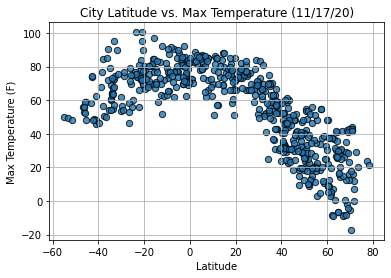

In [164]:
lat_temp_plot = city_data.plot(kind="scatter", x="Lat", y="Max Temp",grid=True, figsize=(6,4), edgecolors = "black", 
                               s=40, alpha=0.8, title="City Latitude vs. Max Temperature (11/17/20)")
lat_temp_plot.set_xlabel("Latitude")
lat_temp_plot.set_ylabel("Max Temperature (F)")
output_file = ("../output_data/latvstemp.png")
plt.savefig(output_file)
plt.show()

## Latitude vs. Humidity Plot

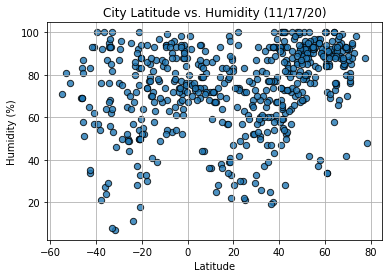

In [165]:
lat_humdity_plot = city_data.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(6,4), edgecolors = "black", s=40, alpha=0.8,
              title="City Latitude vs. Humidity (11/17/20)")
lat_humdity_plot.set_xlabel("Latitude")
lat_humdity_plot.set_ylabel("Humidity (%)")
output_file2 = ("../output_data/latvshumi.png")
plt.savefig(output_file2)
plt.show()

## Latitude vs. Cloudiness Plot

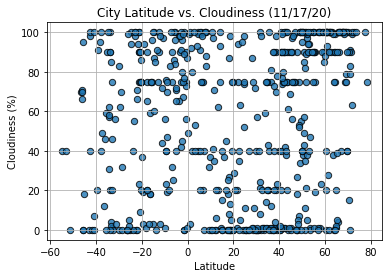

In [166]:
lat_cloudiness_plot = city_data.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(6,4), edgecolors = "black", s=40, alpha=0.8,
              title="City Latitude vs. Cloudiness (11/17/20)")
lat_cloudiness_plot.set_xlabel("Latitude")
lat_cloudiness_plot.set_ylabel("Cloudiness (%)")
output_file3 = ("../output_data/latvscloud.png")
plt.savefig(output_file3)
plt.show()

## Latitude vs. Wind Speed Plot

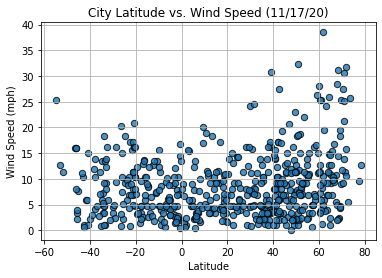

In [159]:
lat_wind_speed_plot = city_data.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(6,4), edgecolors = "black", s=40, alpha=0.8,
              title="City Latitude vs. Wind Speed (11/17/20)")
lat_wind_speed_plot.set_xlabel("Latitude")
lat_wind_speed_plot.set_ylabel("Wind Speed (mph)")
output_file4 = ("../output_data/latvswi.png")
plt.savefig(output_file4)
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


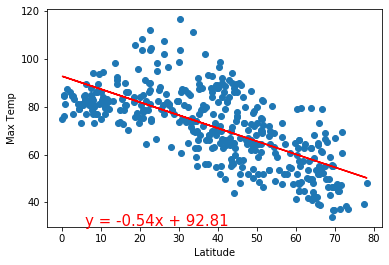

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


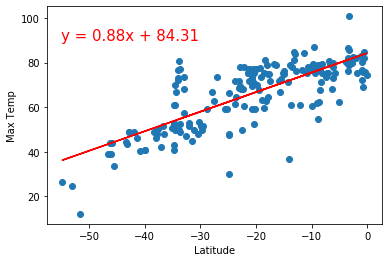

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


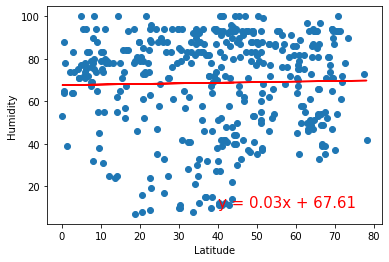

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


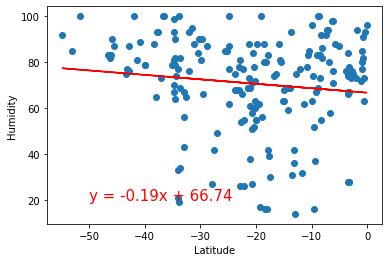

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


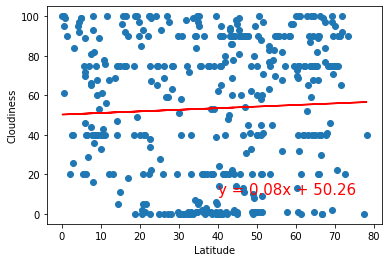

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


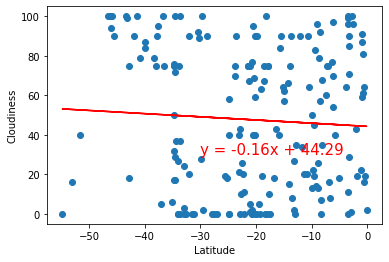

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


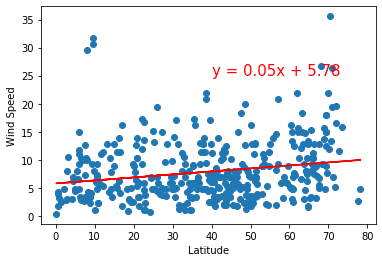

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


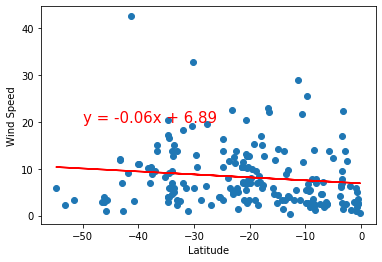